<a href="https://colab.research.google.com/github/mehmettirpan/Colob_Machine_Learning/blob/main/Forecasting_Market_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  #dosyadan verileri(DataFrame) almak için lazım
df = pd.read_csv('/content/AAPL.csv') # AAPL dosyasının konumunu girerek bulunduğu konumdan verilerini çekktik daha doğrusu okuduk
df #df'i yazdırdık

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...,...
10802,2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
10803,2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900
10804,2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300
10805,2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100


# Yeni Bölüm

In [ ]:
df = df[['Date', 'Close']]
#DataFrame in zaman ve kapanış değerlerine odaklanacak şekilde tabloyu ayarladık
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10802,2023-10-18,175.839996
10803,2023-10-19,175.460007
10804,2023-10-20,172.880005
10805,2023-10-23,173.000000


In [ ]:
df['Date'] #DataFrame in zaman kısmı için olan bölümünün çıktısını aldık

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10802    2023-10-18
10803    2023-10-19
10804    2023-10-20
10805    2023-10-23
10806    2023-10-24
Name: Date, Length: 10807, dtype: object

In [1]:
import datetime

# Tarih dizisini datetime nesnesine dönüştüren işlev
def str_to_datetime(s):
    split = s.split('-')  # Tarih dizisini parçalara ayırır
    year, month, day = int(split[0]), int(split[1]), int(split[2])  # Yıl, ay ve gün bilgilerini ayırır
    #split[0] sıfırıncı yani ilk değeri dönderecek olupn yanına tire (-) işareti koyuyor
    return datetime.datetime(year=year, month=month, day=day)  # datetime nesnesi oluşturup döndürür

# Örnek kullanım
datetime_object = str_to_datetime('1980-12-12')  # '1980-12-12' tarih dizisini datetime nesnesine dönüştürür
datetime_object

datetime.datetime(1980, 12, 12, 0, 0)

In [ ]:
df # Tekrardan çıktı alıp sağlamasını yapıyoruz

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10802,2023-10-18,175.839996
10803,2023-10-19,175.460007
10804,2023-10-20,172.880005
10805,2023-10-23,173.000000


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
# yukarıda 'Date' sütununu aldık string değerlerini tarih anlamı taşıyan yani sadece harf olmayan anlamlara dönüştürdük
df['Date']  # çıktısını aldık

<ipython-input-11-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10802   2023-10-18
10803   2023-10-19
10804   2023-10-20
10805   2023-10-23
10806   2023-10-24
Name: Date, Length: 10807, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date') # 'Date' sütununu diziye dönüştürdük daha sonra verilerin analizini yaparken bun değerleri indeksleme amacıyla kullanmak için
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-10-18,175.839996
2023-10-19,175.460007
2023-10-20,172.880005


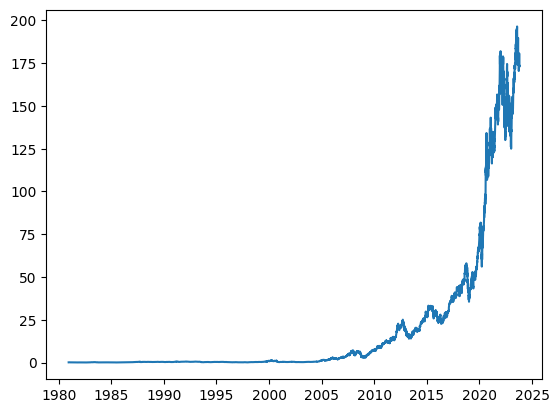

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close']) #burada indeks olarak atadığımız date değerlerine karşılık gelen Close değerlerinden bir çizgi grafiği oluşturduk

In [ ]:
import numpy as np

# DataFrame'deki tarih serisini pencere boyutuna göre işleyen işlev
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  # Başlangıç ve bitiş tarihlerini datetime nesnelerine dönüştür
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date # Hedef tarihi başlangıç tarihi olarak ayarla

  dates = [] # Tarih listesi
  X, Y = [], []   # Özellik ve hedef değer listeleri

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1) # Belirtilen tarihe kadar olan veri alt kümesini al

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()  # 'Close' sütunundaki değerleri numpy dizisine dönüştür
    x, y = values[:-1], values[-1]  # Özellik ve hedef değerleri ayır

    dates.append(target_date) # Hedef tarihi listeye ekle
    X.append(x) # Özellik değerini listeye ekle
    Y.append(y) # Hedef değeri listeye ekle

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]   # Bir sonraki hafta verilerini al
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0]) # Bir sonraki tarihi al
    next_date_str = next_datetime_str.split('T')[0]    # Tarih dizesini ayrıştır
    year_month_day = next_date_str.split('-')  # Yıl, ay ve gün bilgilerini ayır
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))  # Bir sonraki tarihi datetime nesnesine dönüştür

    if last_time:
      break

    target_date = next_date # Hedef tarihi bir sonraki tarihle güncelle


    if target_date == last_date: # Hedef tarih son tarihe eşitse
      last_time = True # Döngüyü sonlandır

  ret_df = pd.DataFrame({})  # Boş bir DataFrame oluştur
  ret_df['Target Date'] = dates  # Tarih listesini 'Target Date' sütunu olarak ekle

  X = np.array(X)  # Özellik değerlerini numpy dizisine dönüştür
  for i in range(0, n):
    X[:, i]  # Özellik değerlerini sıralı olarak al
    ret_df[f'Target-{n-i}'] = X[:, i]  # 'Target' sütunlarını oluştur

  ret_df['Target'] = Y  # 'Target' sütununu ekle

  return ret_df  # Oluşturulan DataFrame'i döndür

# Başlangıç tarihi ve bitiş tarihi arasındaki zaman serisini işleyerek pencere boyutunda DataFrame oluştur

windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df  # Oluşturulan DataFrame'i görüntüle

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,123.389999,122.540001,120.089996,120.589996
1,2021-03-26,122.540001,120.089996,120.589996,121.209999
2,2021-03-29,120.089996,120.589996,121.209999,121.389999
3,2021-03-30,120.589996,121.209999,121.389999,119.900002
4,2021-03-31,121.209999,121.389999,119.900002,122.150002
...,...,...,...,...,...
247,2022-03-17,150.619995,155.089996,159.589996,160.619995
248,2022-03-18,155.089996,159.589996,160.619995,163.979996
249,2022-03-21,159.589996,160.619995,163.979996,165.380005
250,2022-03-22,160.619995,163.979996,165.380005,168.820007


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

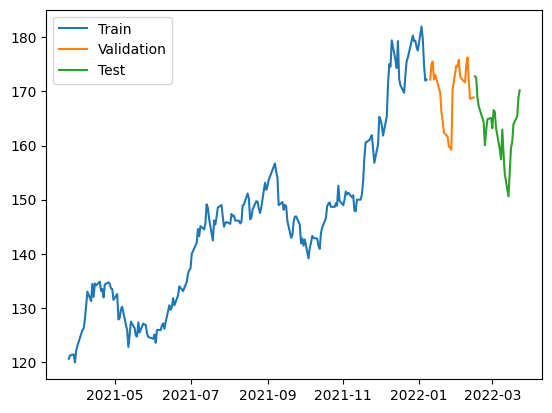

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 99ms/step - loss: 21260.3281 - mean_absolute_error: 145.0171 - val_loss: 28590.6016 - val_mean_absolute_error: 169.0001
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 21006.0020 - mean_absolute_error: 144.1393 - val_loss: 28357.1523 - val_mean_absolute_error: 168.3080
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 20806.6016 - mean_absolute_error: 143.4459 - val_loss: 28111.7227 - val_mean_absolute_error: 167.5772
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 20569.1426 - mean_absolute_error: 142.6135 - val_loss: 27783.5918 - val_mean_absolute_error: 166.5952
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 20242.4609 - mean_absolute_error: 141.4608 - val_loss: 27312.3203 - val_mean_absolute_error: 165.1747
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 19787.3672 - mean_absolute_error: 139.8470 - val_loss: 26669

7/7 [==============================] - 1s 3ms/step


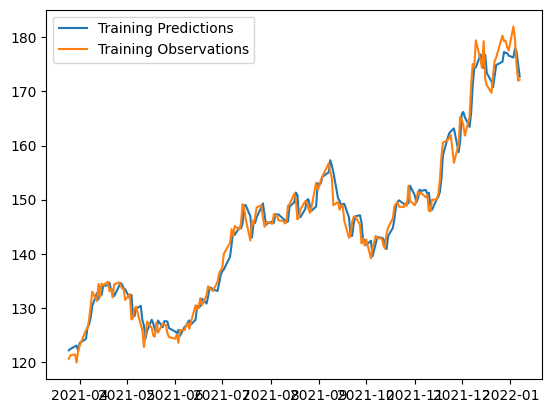

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 90ms/step


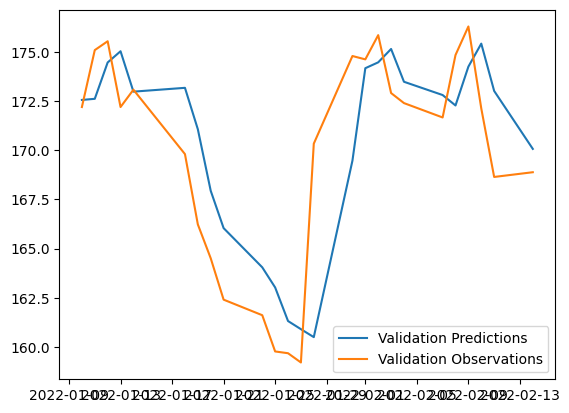

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 21ms/step


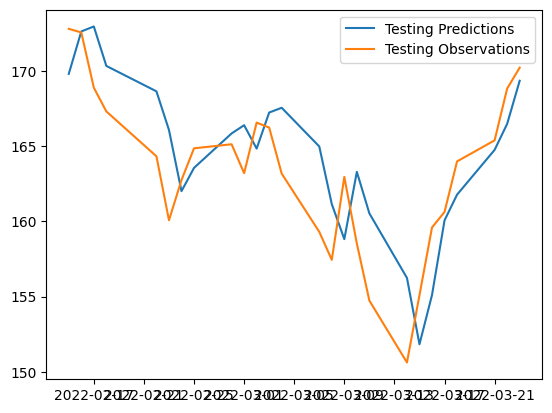

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

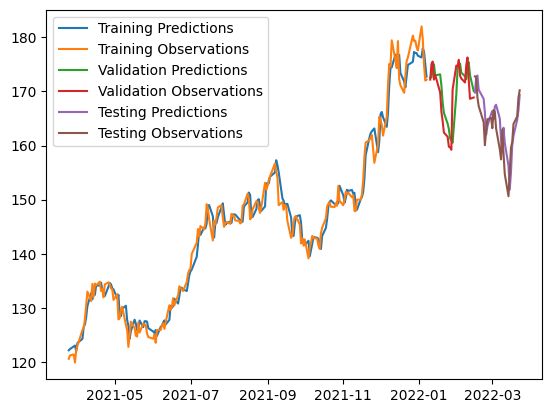

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 31ms/step


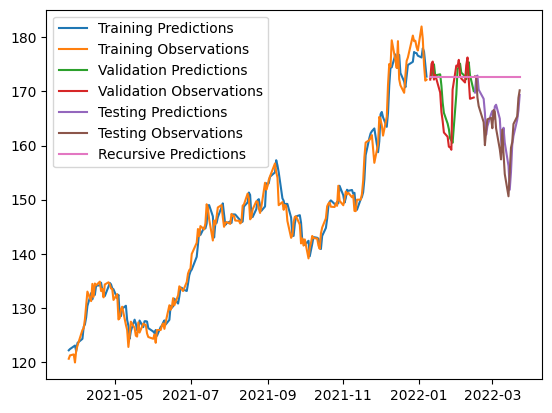

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])